In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [50]:
data = pd.read_csv('bank (6) (1).csv')
print(data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [51]:
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [52]:
#Exploratory Data Analysis (EDA)
#Data Summary:
print(data.describe())



               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

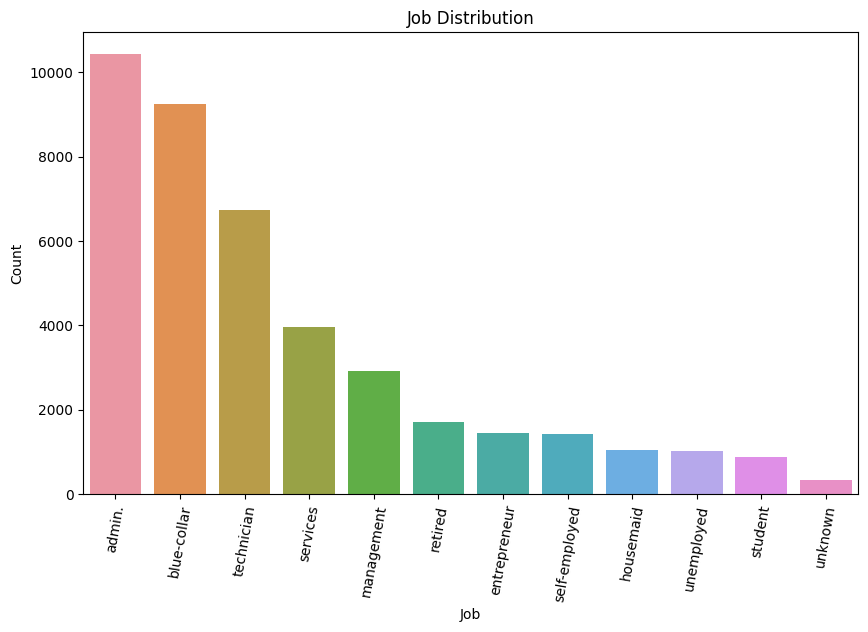

In [53]:
##Analysis of Categorical Features:
data['job'] = data['job'].astype('category')
plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='job', order=data['job'].value_counts().index)
plt.xticks(rotation=80)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
plt.show()

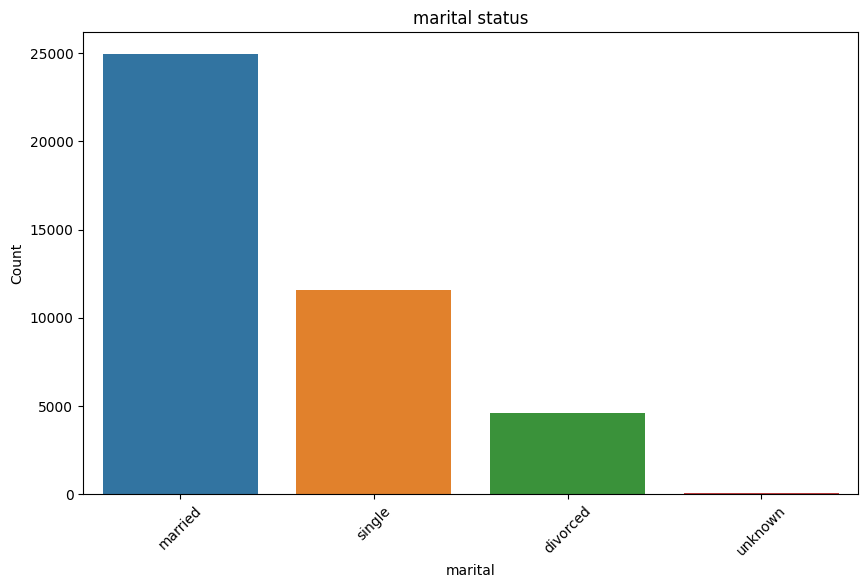

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='marital', order=data['marital'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('marital status')
plt.show()

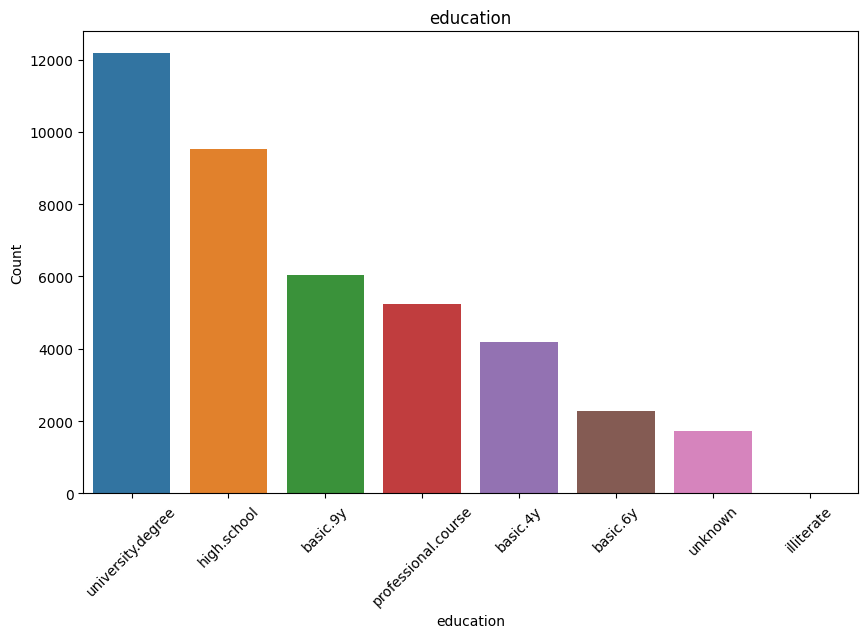

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', order=data['education'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('education')
plt.show()



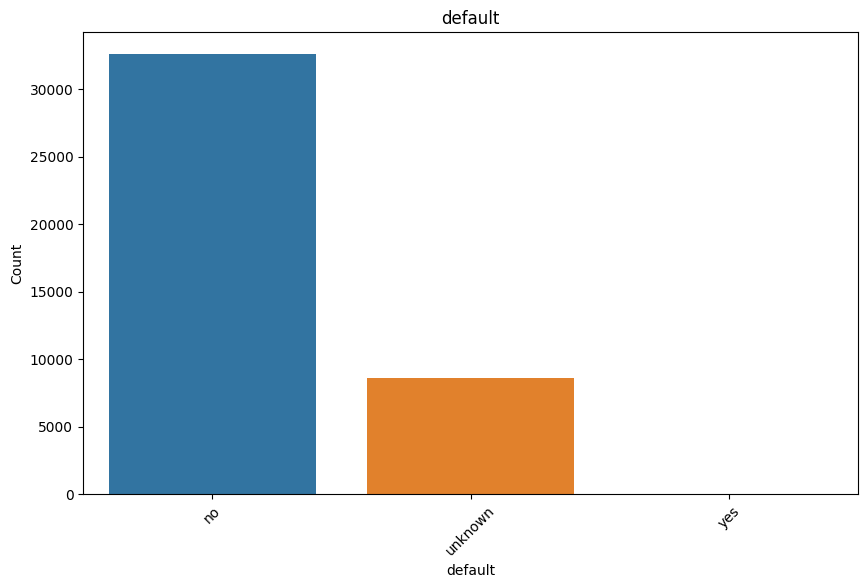

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='default', order=data['default'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('default')
plt.ylabel('Count')
plt.title('default')
plt.show()

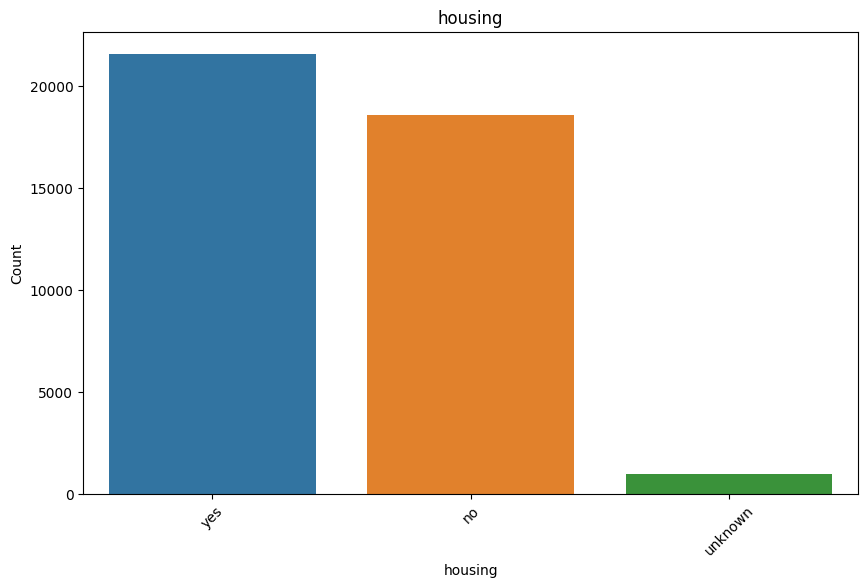

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='housing', order=data['housing'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('housing')
plt.ylabel('Count')
plt.title('housing')
plt.show()

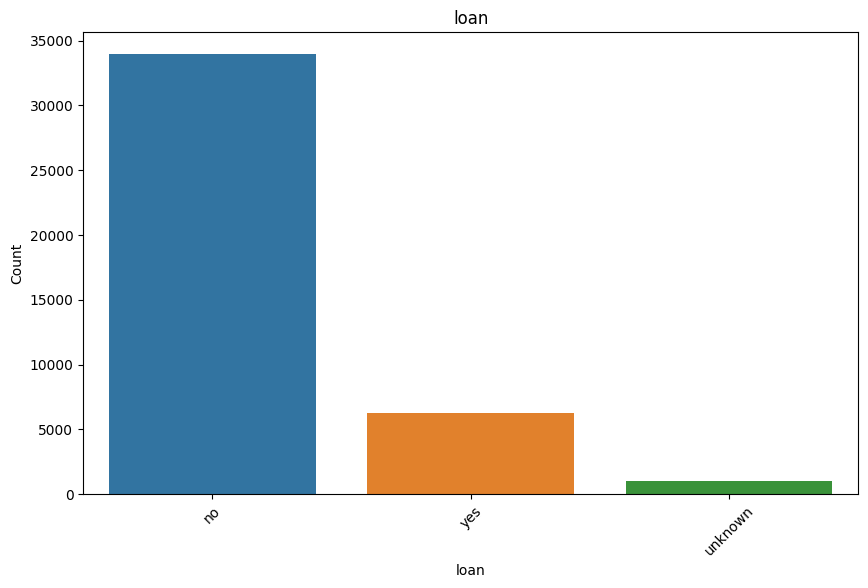

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan', order=data['loan'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('loan')
plt.ylabel('Count')
plt.title('loan')
plt.show()

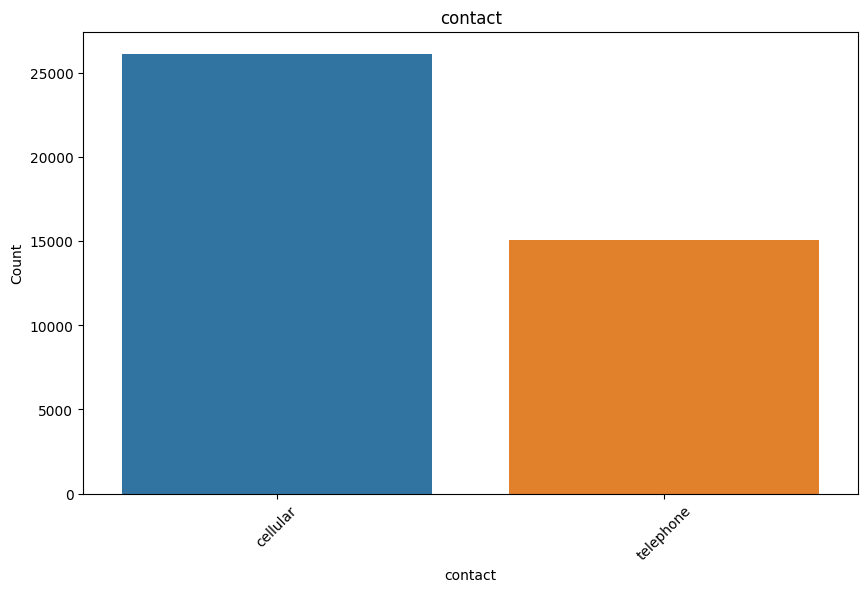

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='contact', order=data['contact'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('contact')
plt.ylabel('Count')
plt.title('contact')
plt.show()

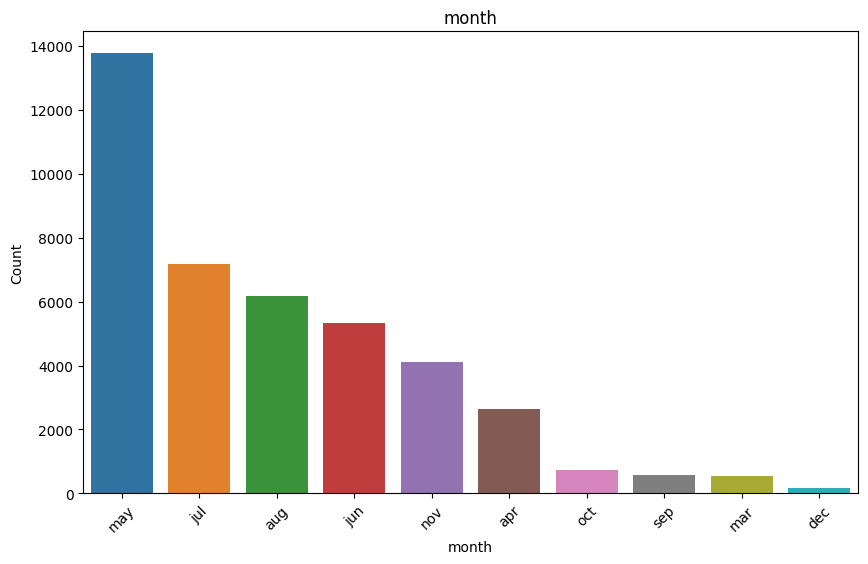

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month', order=data['month'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('month')
plt.ylabel('Count')
plt.title('month')
plt.show()

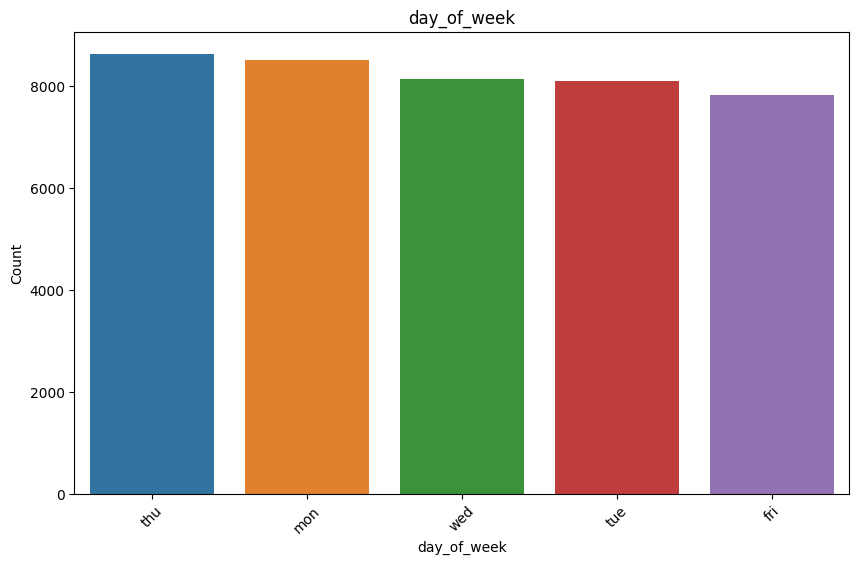

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='day_of_week', order=data['day_of_week'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.title('day_of_week')
plt.show()

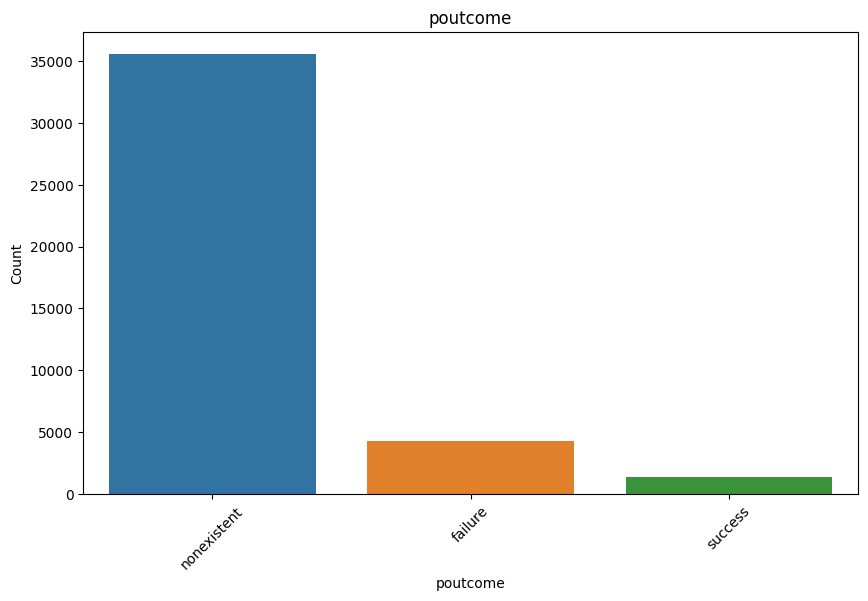

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='poutcome', order=data['poutcome'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.title('poutcome')
plt.show()

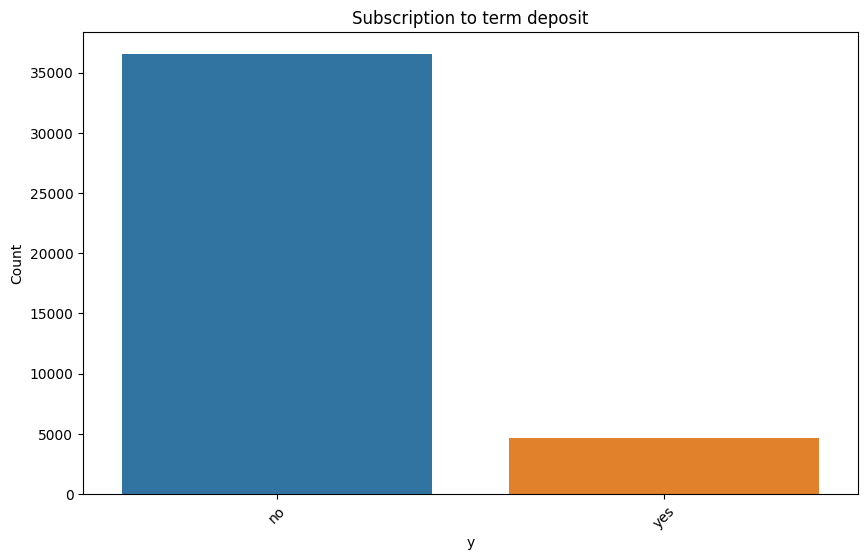

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='y', order=data['y'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('Subscription to term deposit')
plt.show()

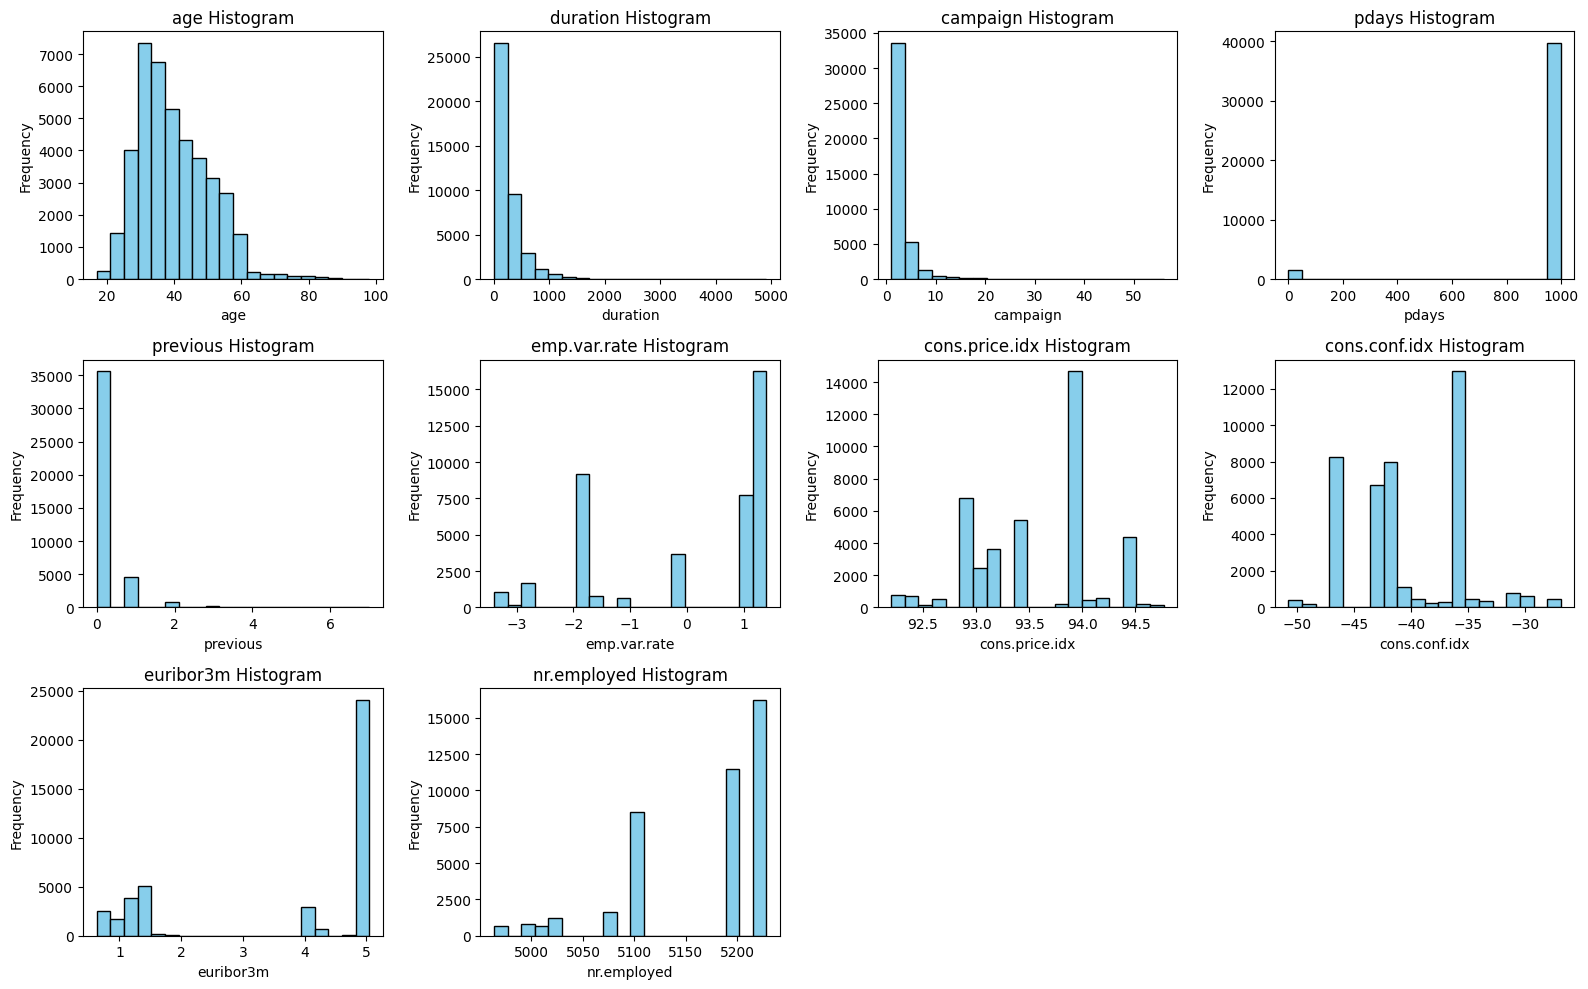

In [65]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create subplots for each numerical column
plt.figure(figsize=(16, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-66-9fd7bf26a3b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


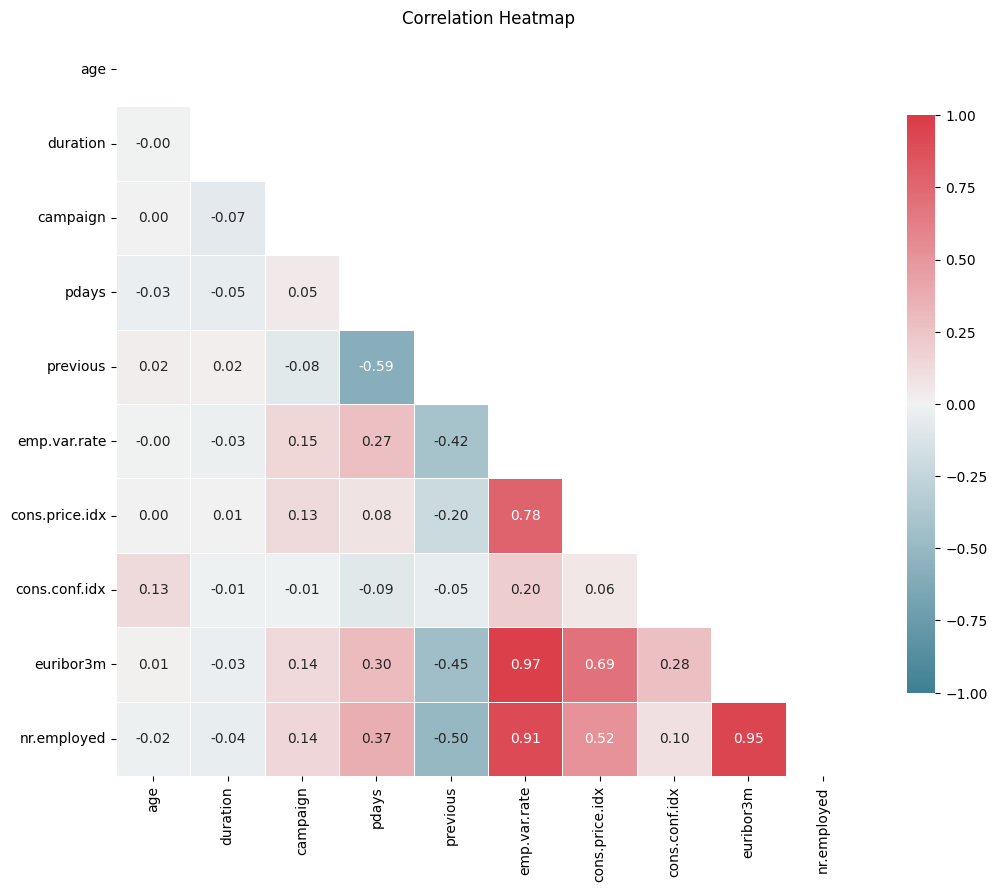

In [66]:
# Create a mask to hide the upper triangular part of the plot:
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Settin up the matplotlib figure
plt.figure(figsize=(12, 10))

# Customizing the color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Creating  the heatmap with annotations and a color bar
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75})

# Adding  the title
plt.title("Correlation Heatmap")

# Displaying the plot
plt.show()

In [67]:
 #2. Feature Engineering
# a) Missing Value Treatment
data.dropna(inplace=True)

In [68]:
 #b) Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [69]:
# c) Imbalanced Data Handling (using SMOTE)
X = data.drop(columns=['y'])
y = data['y']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [70]:
#Missing values were handled by dropna method
#Categorical variables were encoded using label encoding.
#Imbalanced data was addressed using SMOTE(Synthetic Minority Over-sampling Technique), resulting in a balanced dataset.

In [90]:



#SLOT 2





In [85]:
#building three supervised learning models- random forest classifier , Logistic Regression, Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
# MODEL 1 : Random forest classifier:
#For testing the performance of the data model
y_pred = clf.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9136521809500688
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10968
         yes       0.65      0.51      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357

Confusion Matrix:
[[10584   384]
 [  683   706]]


In [89]:

# Model 2: Logistic Regression
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Model 3: Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)



# Evaluating Model 2 (Logistic Regression)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)

# Evaluating Model 3 (Decision Tree Classifier)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
confusion_tree = confusion_matrix(y_test, y_pred_tree)



# Printing evaluation metrics for each model
print("Model 2: Logistic Regression")
print("Accuracy:", accuracy_logistic)
print("\nClassification Report:")
print(report_logistic)
print("\nConfusion Matrix:")
print(confusion_logistic)

print("\nModel 3: Decision Tree Classifier")
print("Accuracy:", accuracy_tree)
print("\nClassification Report:")
print(report_tree)
print("\nConfusion Matrix:")
print(confusion_tree)



Model 2: Logistic Regression
Accuracy: 0.9113862588006798

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10968
         yes       0.67      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357


Confusion Matrix:
[[10689   279]
 [  816   573]]

Model 3: Decision Tree Classifier
Accuracy: 0.8892935178441369

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.94      0.94     10968
         yes       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357


Confusion Matrix:
[[10275   693]
 [  675   714]]
